<html>
    <p style='background:#7B2B5D; color:#F79A23; font-size:20px; padding:10px;'><b>TP Smart Sensors : Apprentissage machine sur des données d’usinage
 </b></p>
</html>

<html>
    <p style='background:#FCDEB6; color:#7B2B5D; font-size:20px; padding:10px;'><b> Réalisé par : Mourad IZEM
        </b></p>
</html>

## PARTIE II 
Dans cette partie, nous allons essayer : 
- Premièrement de prédire la consommation énergétique en se basant sur l'effort appliqué puisque ces deux sont très corrélés 
- Voir si on peut prédire l'usure d'outil (chute de diamètre de perçage) en s'appuyant sur la consommation énergétique.

Nouos allons utilisé les mêmes données de la partie précédente dont on a déjà eliminé les valeurs abérrantes !!

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('data_capteurs.csv')
df= df.drop(['Unnamed: 0'],axis=1)
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 +1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(df, "D_In")
print("Upper : ", upper)
print("Lower : ", lower)
df = df[(df['D_In'] > lower) & (df['D_In'] < upper)]
df

Upper :  6361.7119999999995
Lower :  6355.2959999999985


,P(x),P(y),D_In,D_In_max,D_In_min,D_Out,D_Out_max,D_Out_min,D_Cyl,D_Cyl_max,...,Max_F_T1&T2,Max_F_T2&T3,Max_F_T3&T4,Moy_M_T1&T2,Moy_M_T2&T3,Moy_M_T3&T4,Max_M_T1&T2,Max_M_T2&T3,Max_M_T3&T4,Et_Consommee
0,0,0,6361.101,6390.165,6337.091,6356.137,6379.951,6331.168,6360.885,6386.484880,...,40.333260,60.192380,57.846468,0.039393,0.166414,0.224184,0.060992,0.265538,0.364416,203.421139
1,0,-14800,6360.422,6382.916,6336.803,6356.971,6385.830,6328.615,6361.655,6385.525948,...,46.471775,68.722535,63.219992,0.042361,0.233616,0.338397,0.055130,0.404222,0.509717,311.625602
2,0,-29600,6361.120,6380.387,6342.378,6355.782,6368.560,6346.285,6361.503,6384.172075,...,48.169981,74.660174,69.274525,0.044052,0.270518,0.380102,0.058972,0.471183,0.541733,346.459683
3,0,-44400,6361.548,6387.460,6335.587,6356.731,6374.355,6340.531,6362.440,6392.826233,...,49.695215,80.390653,69.841536,0.046448,0.307440,0.406943,0.065431,0.506979,0.561767,365.956399
5,7400,-7400,6361.162,6386.688,6333.230,6352.789,6380.182,6321.359,6361.187,6390.249536,...,55.521627,91.477684,78.146546,0.050122,0.318756,0.427641,0.070576,0.525139,0.565917,397.828862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,111000,-51800,6358.702,6388.430,6328.112,6344.336,6368.665,6313.815,6357.620,6392.030404,...,123.541648,240.845028,198.967447,0.110002,0.506356,0.520680,0.189979,0.673155,0.677870,515.612055
163,111000,-66600,6355.601,6383.340,6328.381,6343.201,6365.815,6320.822,6356.194,6379.702121,...,126.606445,247.896289,197.072782,0.110156,0.508846,0.517774,0.193966,0.674932,0.679268,514.459703
165,118400,-14800,6357.184,6382.054,6331.823,6345.044,6365.299,6323.676,6357.638,6390.140820,...,126.627987,248.425308,192.645047,0.110182,0.512593,0.522755,0.196364,0.683191,0.686263,518.363776
166,118400,-29600,6358.094,6388.341,6328.915,6344.180,6361.655,6324.250,6358.210,6378.045799,...,131.047667,253.263482,204.158659,0.107396,0.502007,0.534826,0.194563,0.681927,0.690354,530.558941


- La Forte corrélation entre le moment/effort et Econsommée 

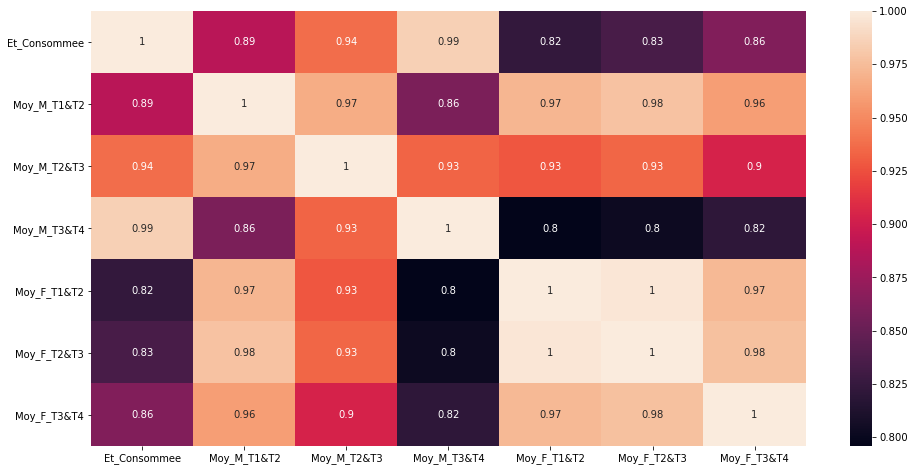

In [2]:
f = df[['Et_Consommee','Moy_M_T1&T2','Moy_M_T2&T3','Moy_M_T3&T4','Moy_F_T1&T2', 'Moy_F_T2&T3', 'Moy_F_T3&T4']]
plt.figure(figsize=(16,8))
sns.heatmap(f.corr(),annot=True)
plt.show()

- on constate que les efforts/les moments et Econsommée sont très corrélés; Alors on aura intérêt de prédire l'un de l'autre ; nous avons choisi de prédire Econsommée par l'effort appliqué lors du perçage ! 

- Création d'un nouveau dataFrame contenent que les features qu'on va utiliser dans cette partie 

In [3]:
df1 = df[['Et_Consommee','Moy_M_T1&T2','Moy_M_T2&T3','Moy_M_T3&T4','Moy_F_T1&T2', 'Moy_F_T2&T3', 'Moy_F_T3&T4','D_In']]

- Définition de l'effort moyen dans les trois couches du matériau 

In [4]:
df1["Effort_moy"] = ((df1["Moy_F_T1&T2"]+df1["Moy_F_T2&T3"]+df1["Moy_F_T3&T4"])/3)
df1

,Et_Consommee,Moy_M_T1&T2,Moy_M_T2&T3,Moy_M_T3&T4,Moy_F_T1&T2,Moy_F_T2&T3,Moy_F_T3&T4,D_In,Effort_moy
0,203.421139,0.039393,0.166414,0.224184,33.975032,53.628251,11.694397,6361.101,33.099227
1,311.625602,0.042361,0.233616,0.338397,39.723554,62.622232,14.035667,6360.422,38.793818
2,346.459683,0.044052,0.270518,0.380102,41.288167,67.834519,14.707066,6361.120,41.276584
3,365.956399,0.046448,0.307440,0.406943,44.174433,72.526406,15.270365,6361.548,43.990401
5,397.828862,0.050122,0.318756,0.427641,47.541527,80.364916,18.865215,6361.162,48.923886
...,...,...,...,...,...,...,...,...,...
162,515.612055,0.110002,0.506356,0.520680,103.125680,211.665341,49.226584,6358.702,121.339202
163,514.459703,0.110156,0.508846,0.517774,104.558589,212.217595,47.792198,6355.601,121.522794
165,518.363776,0.110182,0.512593,0.522755,107.101286,213.316192,47.446110,6357.184,122.621196
166,530.558941,0.107396,0.502007,0.534826,105.896093,215.562764,51.441785,6358.094,124.300214


- Vérification si nous avons des valeurs aberrantes dans l'effort moyen ou l'énergie consommée 

<AxesSubplot:xlabel='Et_Consommee'>

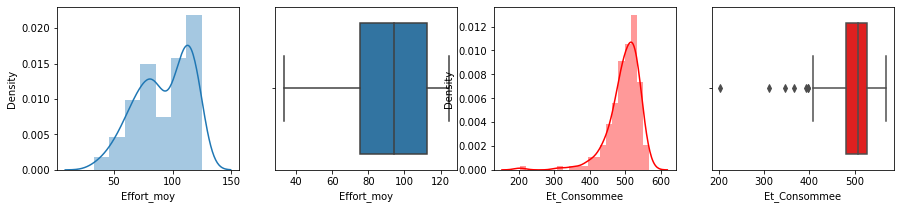

In [5]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.figure(figsize=(15,3))
plt.subplot(1,4,1)
sns.distplot(df1['Effort_moy'])
plt.subplot(1,4,2)
sns.boxplot(df1['Effort_moy'])
plt.subplot(1,4,3)
sns.distplot(df1['Et_Consommee'], color = 'r')
plt.subplot(1,4,4)
sns.boxplot(df1['Et_Consommee'], color = 'r')

- on remarque que nous avons des outliers au niveau de l'énergie consommée qu'on va éliminer par la suite avant de faire l'apprentissage  

Upper :  590.4677398700001
Lower :  415.76529106999993


<AxesSubplot:xlabel='Et_Consommee'>

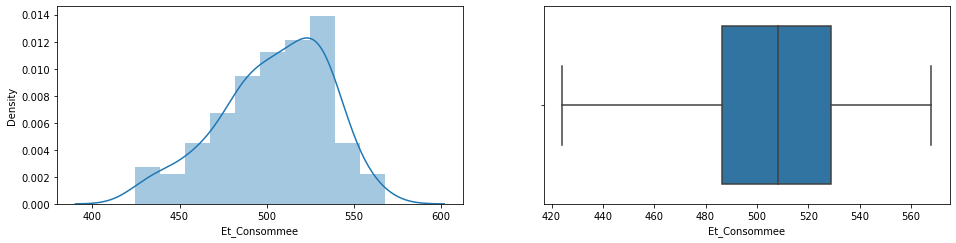

In [6]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.27)
    Q3 = df[feature].quantile(0.73)
    IQR = Q3 - Q1
    upper_limit = Q3 +1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper,lower = outliers(df1, "Et_Consommee")
print("Upper : ", upper)
print("Lower : ", lower)

df1 = df1[(df1['Et_Consommee'] > lower)]
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['Et_Consommee'])
plt.subplot(2,2,2)
sns.boxplot(df1['Et_Consommee'])

In [7]:
df1.shape 

(155, 9)

In [8]:
df1['Et_Consommee'].isnull().sum()

0

- Nous n'avons pas de valeurs manquantes 

- Phase d'apprentissage avec 80% du jeu de données


In [9]:
x = df1['Effort_moy']
y = df1['Et_Consommee']

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train, x_test = x_train.values.reshape([-1, 1]), x_test.values.reshape([-1, 1])

## MLPRegressor  

In [12]:
param_list = {"hidden_layer_sizes": [(1,),(50,),(100,),(200,)], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}

mlp = MLPRegressor(max_iter = 500)
clf = GridSearchCV(mlp, param_list)

clf.fit(x_train, y_train)
#knn.score(x_test, y_test)
print(clf.best_params_, clf.best_score_)

{'activation': 'logistic', 'alpha': 0.0005, 'hidden_layer_sizes': (50,), 'solver': 'lbfgs'} 0.8477870042141135


- Définition du modèles avec les meilleurs params trouvés 

In [13]:
mlp = MLPRegressor(hidden_layer_sizes =  (100,), activation = 'tanh', solver= 'lbfgs',max_iter = 500, alpha = 0.0005)

In [14]:
mlp.fit(x_train,y_train)

MLPRegressor(activation='tanh', alpha=0.0005, max_iter=500, solver='lbfgs')

- Phase de test 

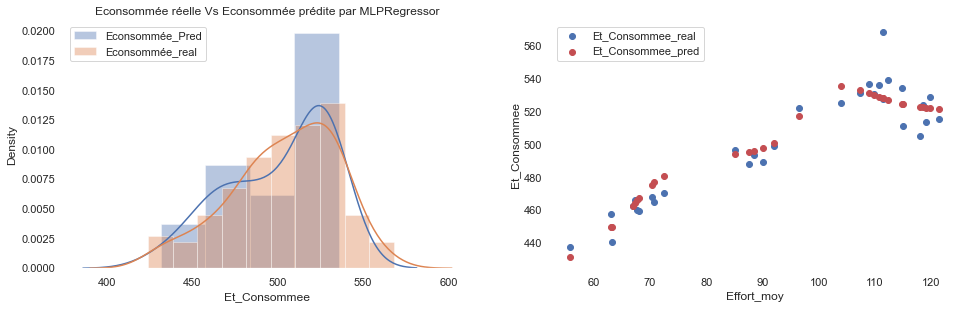

In [15]:
Et_MLP = mlp.predict(x_test)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.title('Econsommée réelle Vs Econsommée prédite par MLPRegressor')
sns.distplot(Et_MLP, label='Econsommée_Pred')
sns.distplot(df1['Et_Consommee'],label='Econsommée_real')
plt.legend()
plt.subplot(2,2,2)
plt.scatter(x_test,y_test)
plt.scatter(x_test, Et_MLP, color = 'r')
plt.xlabel('Effort_moy')
plt.ylabel('Et_Consommee')
plt.legend(['Et_Consommee_real', 'Et_Consommee_pred'])

- Evaluation par MAE et R2 score 

In [16]:
print("MAE: ", mean_absolute_error(y_test, Et_MLP))
print("R2: ", r2_score(y_test, Et_MLP))

MAE:  7.680717634742617
R2:  0.8993123361451427


- Essayons avec d'autres modèles 

## SVR 

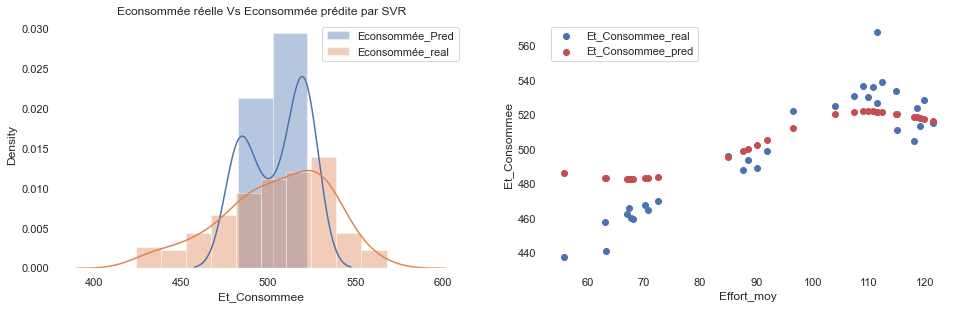

In [17]:
from sklearn.svm import SVR
# create the model object
regressor = SVR(kernel = 'rbf')
# fit the model on the data
regressor.fit(x_train, y_train)
score = regressor.score(x_test,y_test)
Et_SVR = regressor.predict(x_test)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.title('Econsommée réelle Vs Econsommée prédite par SVR')
sns.distplot(Et_SVR, label='Econsommée_Pred')
sns.distplot(df1['Et_Consommee'],label='Econsommée_real')
plt.legend()
plt.subplot(2,2,2)
plt.scatter(x_test,y_test)
plt.scatter(x_test, Et_SVR, color = 'r')
plt.xlabel('Effort_moy')
plt.ylabel('Et_Consommee')
plt.legend(['Et_Consommee_real', 'Et_Consommee_pred'])

In [18]:
print("MAE: ", mean_absolute_error(y_test, Et_SVR))
print("R2: ", r2_score(y_test, Et_SVR))

MAE:  15.284501118639477
R2:  0.6633353867568516


- on remarque que le modèle est beaucoup moins bon que MLPRegressor !! 

## KNN Regressor

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

grid = {'n_neighbors':range(2, 100)}
knn = KNeighborsRegressor()#n_neighbors=30)
clf = GridSearchCV(knn, grid)

clf.fit(x_train, y_train)
#knn.score(x_test, y_test)
print(clf.best_params_, clf.best_score_)

{'n_neighbors': 6} 0.8309762449725442


- Définition du modèle avec les meilleurs paramètres

R2:  0.8806411372428252
MAE:  8.07126492473119


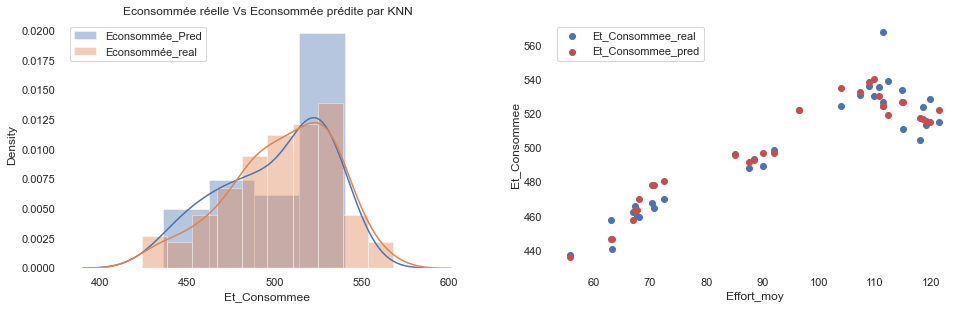

In [20]:
knn = KNeighborsRegressor(n_neighbors = 6)
knn.fit(x_train, y_train)
Et_KNN = knn.predict(x_test)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.title('Econsommée réelle Vs Econsommée prédite par KNN')
sns.distplot(Et_KNN, label='Econsommée_Pred')
sns.distplot(df1['Et_Consommee'],label='Econsommée_real')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(x_test,y_test)
plt.scatter(x_test, Et_KNN, color = 'r')
plt.xlabel('Effort_moy')
plt.ylabel('Et_Consommee')
plt.legend(['Et_Consommee_real', 'Et_Consommee_pred'])

print("R2: ", r2_score(y_test, Et_KNN))
print("MAE: ", mean_absolute_error(y_test, Et_KNN))

## RandomForest Regressor 

R2:  0.8921992994278778
MAE:  8.662412811095376


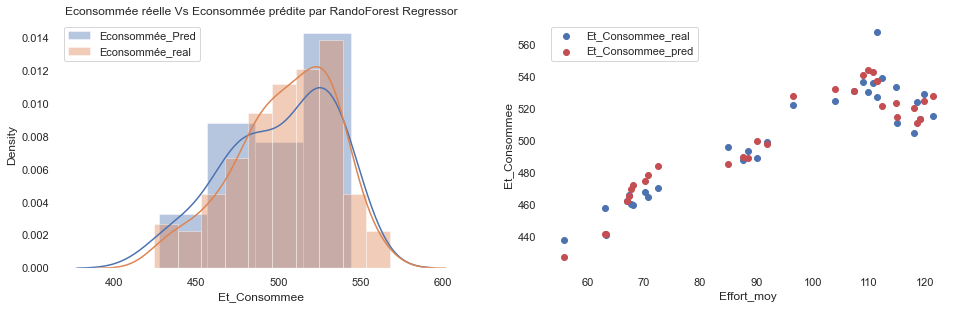

In [21]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators = 1000, max_features = 'sqrt', max_depth = 100, random_state = 1)
RF.fit(x_train,y_train)
Et_RF = RF.predict(x_test)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.title('Econsommée réelle Vs Econsommée prédite par RandoForest Regressor')
sns.distplot(Et_RF, label='Econsommée_Pred')
sns.distplot(df1['Et_Consommee'],label='Econsommée_real')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(x_test,y_test)
plt.scatter(x_test, Et_RF, color = 'r')
plt.xlabel('Effort_moy')
plt.ylabel('Et_Consommee')
plt.legend(['Et_Consommee_real', 'Et_Consommee_pred'])

print("R2: ", r2_score(y_test, Et_RF))
print("MAE: ", mean_absolute_error(y_test, Et_RF))

- le modèle MLPRegressor est meilleur pour prédire Econsommée !!

<html>
    <p style='background:#F7E9F2; color:#000; font-size:15px; padding:10px;'> <b>Résultats</b><br> MLP Regressor > KNN Rregressor > RandomForest Regressor > SVR  
        </p>
</html>

- Voir la possibilité de prédire l'usure (le pourcentage d'usure) en se basant sur Econsommée 
- Définissons d'abord le pourcentage d'usure !!

In [22]:
df1['%_usure'] = ((6360-df1['D_In'])/6360)*100
df1 = df1[(df1['%_usure']>0)]
df1

,Et_Consommee,Moy_M_T1&T2,Moy_M_T2&T3,Moy_M_T3&T4,Moy_F_T1&T2,Moy_F_T2&T3,Moy_F_T3&T4,D_In,Effort_moy,%_usure
11,425.598051,0.056792,0.355087,0.441900,50.480168,91.117613,20.629020,6359.720,54.075600,0.004403
17,447.701886,0.062306,0.375475,0.477723,54.934527,100.772440,24.262869,6359.552,59.989945,0.007044
19,457.724387,0.065038,0.394307,0.484026,57.829997,106.661915,24.864697,6359.156,63.118870,0.013270
20,451.011937,0.068660,0.399550,0.469306,58.023304,106.587814,22.962956,6359.593,62.524691,0.006399
21,454.449895,0.065433,0.381150,0.464606,57.216151,105.807882,24.849058,6359.652,62.624364,0.005472
...,...,...,...,...,...,...,...,...,...,...
162,515.612055,0.110002,0.506356,0.520680,103.125680,211.665341,49.226584,6358.702,121.339202,0.020409
163,514.459703,0.110156,0.508846,0.517774,104.558589,212.217595,47.792198,6355.601,121.522794,0.069167
165,518.363776,0.110182,0.512593,0.522755,107.101286,213.316192,47.446110,6357.184,122.621196,0.044277
166,530.558941,0.107396,0.502007,0.534826,105.896093,215.562764,51.441785,6358.094,124.300214,0.029969


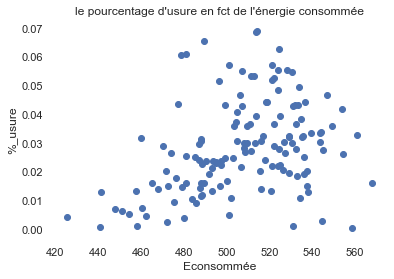

In [23]:
plt.scatter(df1['Et_Consommee'],df1['%_usure'])
plt.title("le pourcentage d'usure en fct de l'énergie consommée")
plt.xlabel("Econsommée")
plt.ylabel("%_usure")
plt.show() 

- Est ce que les deux sont vraiment corrélés ???

In [24]:
d =df1.corr()
d['%_usure'].sort_values(ascending = False)

%_usure         1.000000
Moy_F_T1&T2     0.557135
Moy_F_T2&T3     0.548634
Effort_moy      0.544199
Moy_M_T2&T3     0.543472
Moy_M_T1&T2     0.541209
Moy_F_T3&T4     0.485861
Et_Consommee    0.345876
Moy_M_T3&T4     0.329473
D_In           -1.000000
Name: %_usure, dtype: float64

- On voit clairement que l'usure et Econsommée ne sont pas assez corrélés (0.34) ce suis rend la prédiction de l'un à partir de l'autre difficile et pas sûre, essayons comme même !!

In [25]:
x = df1['Et_Consommee']
y = df1['%_usure']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train, x_test = x_train.values.reshape([-1, 1]), x_test.values.reshape([-1, 1])

## MLPRegressor 

In [26]:
param_list = {"hidden_layer_sizes": [(1,),(50,),(100,),(200,)], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}

mlp2 = MLPRegressor(max_iter = 500)
clf = GridSearchCV(mlp, param_list)

clf.fit(x_train, y_train)
#knn.score(x_test, y_test)
print(clf.best_params_, clf.best_score_)

{'activation': 'logistic', 'alpha': 0.0005, 'hidden_layer_sizes': (200,), 'solver': 'lbfgs'} 0.04877909688795954


In [27]:
mlp2 = MLPRegressor(hidden_layer_sizes =  (200,), activation = 'logistic',alpha =  0.0005, solver= 'lbfgs',max_iter = 500)
mlp2.fit(x_train,y_train)

MLPRegressor(activation='logistic', alpha=0.0005, hidden_layer_sizes=(200,),
             max_iter=500, solver='lbfgs')

R2:  0.060066468074988166
MAE:  0.01062446470306427


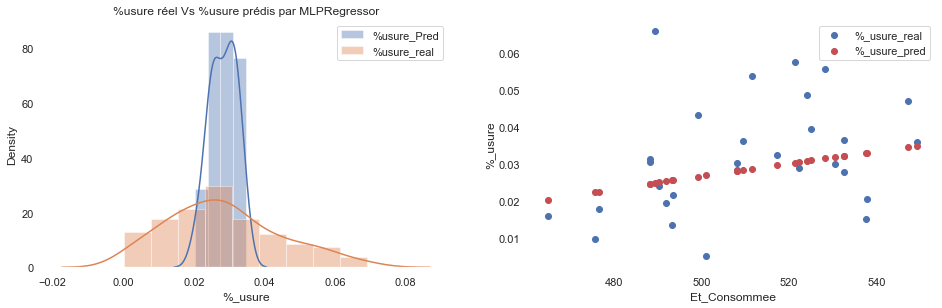

In [37]:
Usure_MLP = mlp2.predict(x_test)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.title('%usure réel Vs %usure prédis par MLPRegressor')
sns.distplot(Usure_MLP, label='%usure_Pred')
sns.distplot(df1['%_usure'],label='%usure_real')
plt.legend()
plt.subplot(2,2,2)
plt.scatter(x_test,y_test)
plt.scatter(x_test, Usure_MLP, color = 'r')
plt.xlabel('Et_Consommee')
plt.ylabel('%_usure')
plt.legend(['%_usure_real', '%_usure_pred'])

print("R2: ", r2_score(y_test, Usure_MLP))
print("MAE: ", mean_absolute_error(y_test, Usure_MLP))

## Regression linéaire 

In [38]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train , y_train)

In [39]:
Usure_LR = reg.predict(x_test)

R2:  0.06097654220127968
MAE:  0.010530145959192242


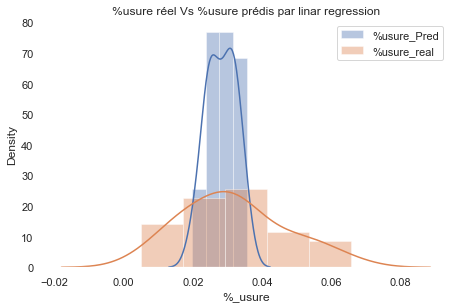

In [41]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.title('%usure réel Vs %usure prédis par linar regression')
sns.distplot(Usure_LR, label='%usure_Pred')
sns.distplot(y_test,label='%usure_real')
plt.legend()

print("R2: ", r2_score(y_test, Usure_LR))
print("MAE: ", mean_absolute_error(y_test, Usure_LR))

In [42]:
grid = {'n_neighbors':range(2, 100)}
knn = KNeighborsRegressor()#n_neighbors=30)
clf = GridSearchCV(knn, grid)

clf.fit(x_train, y_train)
#knn.score(x_test, y_test)
print(clf.best_params_, clf.best_score_)

{'n_neighbors': 11} 0.1298269099216271


R2:  0.026022513496025468
MAE:  0.011109106681651246
MSE:  0.00021369140541144013


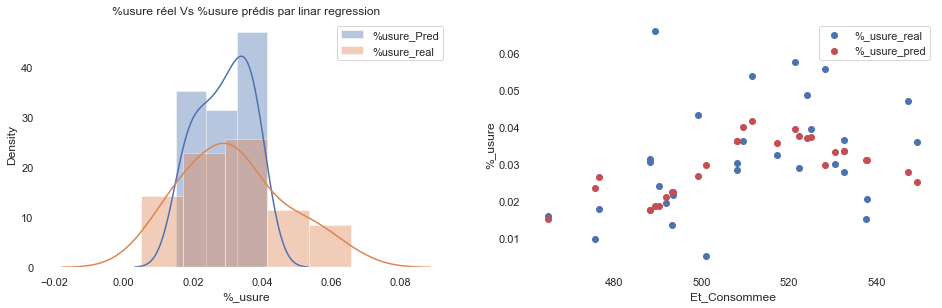

In [44]:
knn = KNeighborsRegressor(n_neighbors = 11)
knn.fit(x_train, y_train)
Usure_KNN = knn.predict(x_test)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.title('%usure réel Vs %usure prédis par linar regression')
sns.distplot(Usure_KNN, label='%usure_Pred')
sns.distplot(y_test,label='%usure_real')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(x_test,y_test)
plt.scatter(x_test, Usure_KNN, color = 'r')
plt.xlabel('Et_Consommee')
plt.ylabel('%_usure')
plt.legend(['%_usure_real', '%_usure_pred'])

print("R2: ", r2_score(y_test, Usure_KNN))
print("MAE: ", mean_absolute_error(y_test, Usure_KNN))
print("MSE: ", mean_squared_error(y_test, Usure_KNN))

- Les résultats de la prédiction ne sont pas vraiment satisfaisants !! peut-être il faut ajouter d'autres features ?